In [30]:
#https://github.com/astropy/astropy-workshop/blob/main/02b-OOP/intro_to_oop.ipynb
#april 25 GP
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from glob import glob
from itertools import cycle

In [37]:
class LightCurve:
    
    def __init__(self, times=None, fluxes=None, uncertainties=None, flags=None, name=None):
        self.times = times
        self.fluxes = fluxes
        self.uncertainties = uncertainties
        self.flags = flags
        self.name = name

    def plot(self, color=None): #, linestyle=None, linewidth=None,
             #label=None, ax=None):
        """ Plot the light curve """
        plt.errorbar(self.times, self.fluxes, self.uncertainties, fmt='.',
                     color=color) #, linestyle=linestyle, linewidth=linewidth, label=self.name)
        plt.xlabel('Time [days]')
        plt.ylabel('Flux [mJy]')
        plt.legend(loc=2)

    @classmethod
    #https://www.geeksforgeeks.org/classmethod-in-python/
    def from_txt(cls, path):
        data = np.loadtxt(path)

        times = data[0, :]
        fluxes = data[1, :]
        uncertainties = data[2, :]
        flags = data[3, :]
        
        return cls(times=times, fluxes=fluxes,
                   uncertainties=uncertainties, flags=flags)

    def clean(self, order=1):
        poly_params = np.polyfit(self.times, self.fluxes, order)
        best_fit_model = np.polyval(poly_params, self.times)

        self.fluxes /= best_fit_model
        self.uncertainties /= best_fit_model
        
        self.cleaned = True



In [23]:
%run generate_lcs.py

In [32]:
path = 'sample_lcs/lc_1.txt'
lc0 =LightCurve.from_txt(path)
lc0.name = 'LC-0'
lc0.plot(label=lc0.name)

TypeError: LightCurve.plot() got an unexpected keyword argument 'label'

9.52358960710088
10.099316519290575
10.799993840319134
9.761695971997165
10.7130254089674
9.681054709151187
10.647275453142178
11.123492639769253
10.70367020442618
10.703309936874517


C:\Users\Georgi\AppData\Local\Temp\ipykernel_10572\2808416774.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=2)


True

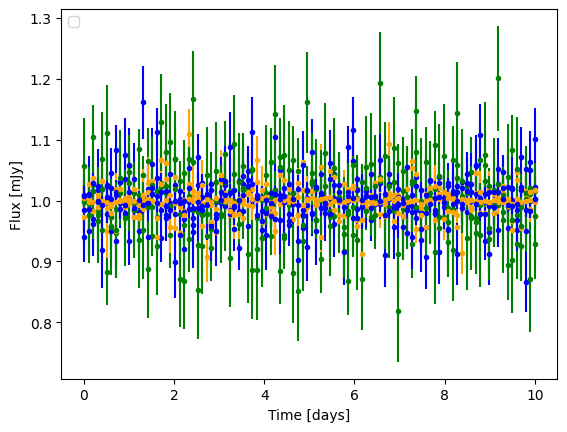

In [39]:
lc_paths = glob('sample_lcs/*.txt')
#print(lc_paths)
lightcurves = [LightCurve.from_txt(path) for path in lc_paths]
c=cycle(['b', 'g' , 'orange'])

for lightcurve in lightcurves:     
    print(lightcurve.fluxes.mean())
    lightcurve.clean()
    lightcurve.plot(next(c))

lightcurves[0].cleaned

In [ ]:
times = np.linspace(0, 10, 100)
#print(times[0:10])
sigma = 0.1
fluxes = 1 + sigma * np.random.randn(len(times))
uncertainties = sigma * np.ones_like(fluxes)
flags = np.random.randint(0, 5, len(fluxes))
name = 'proxima Centauri'

times2 = np.linspace(0, 10, 100)
#print(times[0:10])
sigma2 = 0.15
fluxes2 = 1 + sigma * np.random.randn(len(times))
uncertainties2 = sigma * np.ones_like(fluxes)
flags2 = np.random.randint(0, 5, len(fluxes))
name2 = 'alpha Centauri A'

prox_cen = LightCurve(times=times, fluxes=fluxes,
                     uncertainties=uncertainties, flags=flags,
                     name=name)

cen_A = LightCurve(times=times2, fluxes=fluxes2,
                     uncertainties=uncertainties2, flags=flags2,
                     name=name2)
fig=plt.figure(figsize=(15,10))
ax1 = plt.subplot(211)

prox_cen.plot('green', '-', 0.7,  name)
ax2 = plt.subplot (212)
cen_A.plot('b', '-', 0.7, name)

#plt.savefig('curves.png')

